<h2 style="background:#003441; color:white; padding:3px 20px; text-align:center">
Samia Nasser,data science intern in Sparks Foundations  </h2>



<h2 style="background: #009dc4; color:white; padding:10px 20px;">
Task1 
    <br>
       <br>
    Prediction using Supervised ML ,liener Regressions
</h2>
<h5> In this file ,i wrote python code to Predict the percentage of marks of the students based on the number of hours they studied </h5>



<h4 style="background:#c9f4fe; color:black; padding:3px 20px;">
#Step1
    <br>    <br> Get the data  </h4>



In [303]:
import pandas as pd
data=pd.read_csv('student_score.csv')
data

,"Hours,Scores"
0,"2.5,21"
1,"5.1,47"
2,"3.2,27"
3,"8.5,75"
4,"3.5,30"
5,"1.5,20"
6,"9.2,88"
7,"5.5,60"
8,"8.3,81"
9,"2.7,25"



<h4 style="background:#c9f4fe; color:black; padding:3px 20px;">
#Step2
    <br>    <br> Discover and visualize the data to gain insights </h4>



In [304]:
data.head(10)

,"Hours,Scores"
0,"2.5,21"
1,"5.1,47"
2,"3.2,27"
3,"8.5,75"
4,"3.5,30"
5,"1.5,20"
6,"9.2,88"
7,"5.5,60"
8,"8.3,81"
9,"2.7,25"


In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Hours,Scores  25 non-null     object
dtypes: object(1)
memory usage: 328.0+ bytes


In [306]:
#Convert data to Dataframe
df = pd.DataFrame(data)


In [307]:
#split csv file to two columns 
data[['Hours','Scores']]=df['Hours,Scores'].str.split(',', expand=True)
df

,"Hours,Scores",Hours,Scores
0,"2.5,21",2.5,21
1,"5.1,47",5.1,47
2,"3.2,27",3.2,27
3,"8.5,75",8.5,75
4,"3.5,30",3.5,30
5,"1.5,20",1.5,20
6,"9.2,88",9.2,88
7,"5.5,60",5.5,60
8,"8.3,81",8.3,81
9,"2.7,25",2.7,25


In [308]:
df.drop(columns=['Hours,Scores'], inplace = True)

In [309]:
#check if there is null data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [310]:
df.shape

(25, 2)

In [311]:
#convert data  to numeric 
df = df.astype({'Hours':'float','Scores':'int'})
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [312]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


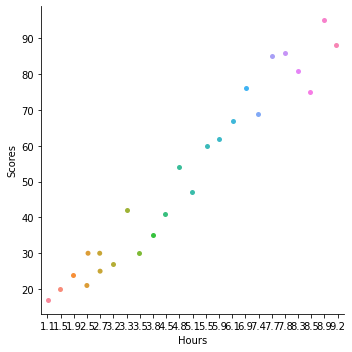

In [313]:
sns.catplot(data=df, x="Hours", y="Scores")

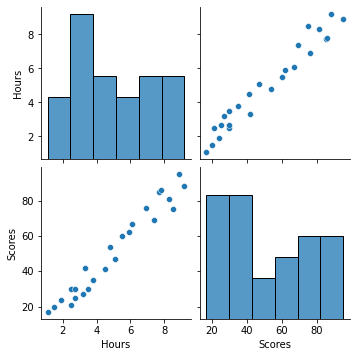

In [314]:
sns.pairplot(df,  diag_kind="hist")


<h4 style="background:#c9f4fe; color:black; padding:3px 20px;">
#Step3
    <br>    <br> split data to train and test data </h4>



In [315]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

label_data = df.copy()
X= label_data.drop(['Scores'],axis =1)
y= label_data['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state =7,shuffle=False)

In [316]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5



<h4 style="background:#c9f4fe; color:black; padding:3px 20px;">
#Step4
    <br>    <br> Training and Evaluating on the Training Set </h4>



In [317]:
predict_model = LinearRegression()
# Fitting the Data into the model
predict_model.fit(X_train, y_train)

LinearRegression()

In [318]:
#Predicting the Percentage of score

tree_reg= predict_model.predict(X_test)
tree_reg

array([61.06863209, 73.48554837, 28.59362026, 48.6517158 , 39.10024174,
       68.70981134, 77.306138  ])

# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [319]:
hours = [9.25]
# hours=float(input("Enter  hours of study:"))
# hours=[hours]
answer = predict_model.predict([hours])
print("the predct Score of study 9.25 hours  = {}".format(round(answer[0],3)))

the predct Score of study 9.25 hours  = 91.156


C:\Users\Eng.samiah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



<h4 style="background:#c9f4fe; color:black; padding:3px 20px;">
    evaluation the model
</h4>



In [320]:
#define cross-validation method to use
from sklearn.model_selection import KFold
from numpy import mean,absolute,sqrt

cv = KFold(n_splits=10, random_state=1, shuffle=True)
#use k-fold CV to evaluate model
scores = cross_val_score(predict_model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))


5.40385626970302

In [321]:
import joblib
joblib.dump(predict_model, "scores_model.pkl")
# and later...
my_model_loaded = joblib.load("scores_model.pkl")